In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

%matplotlib inline
sns.set()

# Markov chain is a math system of random variables transitioning between states with probabilistic rules.

## While these random var satisfying Markov Property
# "transition depends solely on CURRENT STATE and TIME LAPSED, NOT on sequence of state preceded"

# "Sans souvenir"

> **MC has prolific usages in math, econ, game, communication, genetics and finance**
> **such as postulating cruise control, queue theory, xrate; random gen essentially**

### 1. In short, MC is a random process with Markov Property.
### 2. Random process or STOCHASTIC process is math object of set of random variables.
### 3. MC, discrete STATE SPACE or discrete INDEX SET (time)

## DISCRETE TIME MC
> **Steps represents moments in time (or phiscal distance or any discrete measurement)**

> **In math: $Pr\,(X_{n+1}=x \mid X_1=x_1,\,X_2=X_2\,...,\,X_n=x_n) = Pr\,(X_{n+1}=x \mid X_n=x_n)$**

In [19]:
from IPython.display import display, Math, Latex

display(Math(r'F(k) = \int_{-\infty}^{\infty} f(x) e^{2\pi i k} dx'))
display(Math(r'Pr(X_{n+1}=x | X_1=x_1, X_2=x_2, X_3=x_3..., X_n=x_n) = Pr(X_{n+1}=x | X_n=x_n)'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Possible value of $X_i$ form a countable set S called STATE SPACE of chain. 

# MODEL
## using probabilisitic AUTOMATION, including proba of a given transition into the transition function, turning it into a transition matrix. EVERY STATE in space is included once as ROW and again as COL, each CELL in MATRIX gives proba of transition from row_state to col_state
## If MC has N states, the matrix will be N x N, s.t. (I,J) is the proba(I to J), AND MUST $\sum Row_i =1$ !! or a proba distribution.

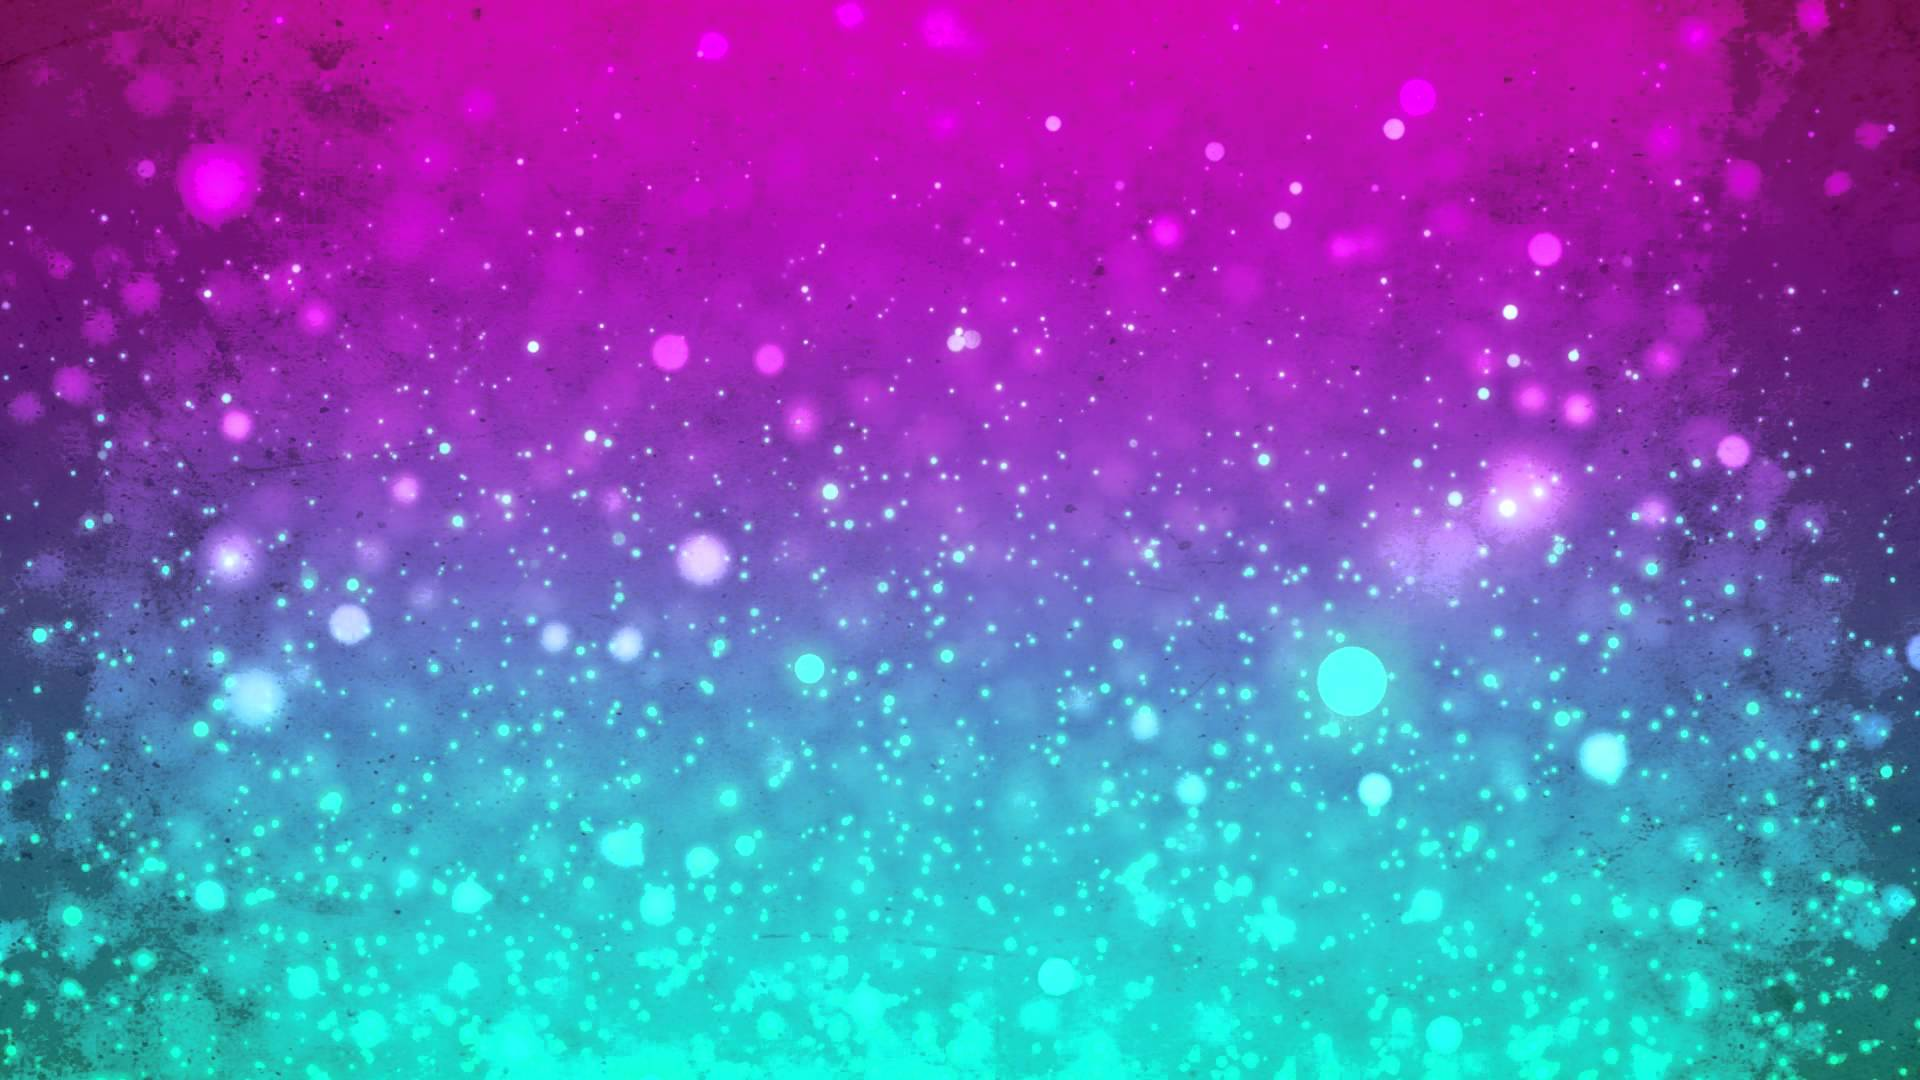

In [24]:
from IPython.display import Image
from IPython.core.display import HTML 

Image(url= "http://my_site.com/my_picture.jpg", 
      width=100, height=100)
display(Image('https://i.ytimg.com/vi/j22DmsZEv30/maxresdefault.jpg', 
              width=1900, unconfined=True))



## One example: When $C_j$ is sad, she either goes for run, googbles, or naps. Historically, if she spent sleeping a sad day, the next day 60% go for run, 20% in bed and 20% goobles.
Alone with other possible (I,J) matrix as given....

![Image](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1523011817/state_diagram_pfkfld.png)




## Or in matrix table
![Image](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1523011817/transition_matrix_gj27nq.png)

## Now one can ask: 'starting from state(sleep), what's proba($C_j$) will be state(run) at the end of 2-day?
> $(0.2\times0.6)+(0.6\times0.6)+(0.2\times0.7)=0.62$

## Now clears with some properties of MC:
1. REDUCIBILITY: MC irreducible if it's possible to get to any state from any state, or a chain of steps between i,j with positive proba
2. PERIODICITY: if chain can return to the state ONLY at multiples of some int larger than 1. or starting i, returns to i at multiples of period k > 1.
3. TRANSIENCE AND RECURRENCE: state(i) is transient if, given starting at $state_i$, there's a non-zero proba to never return to $state_i$. Recurrence otherwise. 
4. ERGODICITY: if it's Aperiodic and positive recurrent, if all states in an irreducible MC are ergodic, the chain is so
5. ABSORBING STATE: if impossible to leave this state, $state_i \,is\,absorbing\,if\, p_{ii} = 1\,and\,p_{ij} = 0\quad\forall \:i\,\ne\,j$


In [40]:
# define statespace

states = ['Sleep', 'Icecream', 'Run']

transitionName = [["SS","SR","SI"],
                  ["RS","RR","RI"],
                  ["IS","IR","II"]]
transitionMatrix = [[0.2,0.6,0.2],
                    [0.1,0.6,0.3],
                    [0.2,0.7,0.1]]

# checking unity

if sum(transitionMatrix[0])+sum(transitionMatrix[1])+sum(transitionMatrix[1]) != 3:
    print("Somewhere, something went wrong. Transition matrix, perhaps?")
else: print("All is gonna be okay, you should move on!! ;)")



All is gonna be okay, you should move on!! ;)


In [41]:
# A function that implements the Markov model to forecast the state/mood.
def activity_forecast(days):
    # Choose the starting state
    activityToday = "Sleep"
    print("Start state: " + activityToday)
    # Shall store the sequence of states taken. So, this only has the starting state for now.
    activityList = [activityToday]
    i = 0
    # To calculate the probability of the activityList
    prob = 1
    while i != days:
        if activityToday == "Sleep":
            change = np.random.choice(transitionName[0],replace=True,p=transitionMatrix[0])
            if change == "SS":
                prob = prob * 0.2
                activityList.append("Sleep")
                pass
            elif change == "SR":
                prob = prob * 0.6
                activityToday = "Run"
                activityList.append("Run")
            else:
                prob = prob * 0.2
                activityToday = "Icecream"
                activityList.append("Icecream")
        elif activityToday == "Run":
            change = np.random.choice(transitionName[1],replace=True,p=transitionMatrix[1])
            if change == "RR":
                prob = prob * 0.5
                activityList.append("Run")
                pass
            elif change == "RS":
                prob = prob * 0.2
                activityToday = "Sleep"
                activityList.append("Sleep")
            else:
                prob = prob * 0.3
                activityToday = "Icecream"
                activityList.append("Icecream")
        elif activityToday == "Icecream":
            change = np.random.choice(transitionName[2],replace=True,p=transitionMatrix[2])
            if change == "II":
                prob = prob * 0.1
                activityList.append("Icecream")
                pass
            elif change == "IS":
                prob = prob * 0.2
                activityToday = "Sleep"
                activityList.append("Sleep")
            else:
                prob = prob * 0.7
                activityToday = "Run"
                activityList.append("Run")
        i += 1  
    print("Possible states: " + str(activityList))
    print("End state after "+ str(days) + " days: " + activityToday)
    print("Probability of the possible sequence of states: " + str(prob))

# Function that forecasts the possible state for the next 2 days
activity_forecast(2)


Start state: Sleep
Possible states: ['Sleep', 'Sleep', 'Run']
End state after 2 days: Run
Probability of the possible sequence of states: 0.12


> You get a random set of transitions possible along with the probability of it happening, starting from state: Sleep. Extend the program further to maybe iterate it for a couple of hundred times with the same starting state, you can then see the expected probability of ending at any particular state along with its probability. Let's rewrite the function activity_forecast and add a fresh set of loops to do this...

In [42]:
def activity_forecast(days):
    # Choose the starting state
    activityToday = "Sleep"
    activityList = [activityToday]
    i = 0
    prob = 1
    while i != days:
        if activityToday == "Sleep":
            change = np.random.choice(transitionName[0],replace=True,p=transitionMatrix[0])
            if change == "SS":
                prob = prob * 0.2
                activityList.append("Sleep")
                pass
            elif change == "SR":
                prob = prob * 0.6
                activityToday = "Run"
                activityList.append("Run")
            else:
                prob = prob * 0.2
                activityToday = "Icecream"
                activityList.append("Icecream")
        elif activityToday == "Run":
            change = np.random.choice(transitionName[1],replace=True,p=transitionMatrix[1])
            if change == "RR":
                prob = prob * 0.5
                activityList.append("Run")
                pass
            elif change == "RS":
                prob = prob * 0.2
                activityToday = "Sleep"
                activityList.append("Sleep")
            else:
                prob = prob * 0.3
                activityToday = "Icecream"
                activityList.append("Icecream")
        elif activityToday == "Icecream":
            change = np.random.choice(transitionName[2],replace=True,p=transitionMatrix[2])
            if change == "II":
                prob = prob * 0.1
                activityList.append("Icecream")
                pass
            elif change == "IS":
                prob = prob * 0.2
                activityToday = "Sleep"
                activityList.append("Sleep")
            else:
                prob = prob * 0.7
                activityToday = "Run"
                activityList.append("Run")
        i += 1    
    return activityList

# To save every activityList
list_activity = []
count = 0

# `Range` starts from the first count up until but excluding the last count
for iterations in range(1,10000):
        list_activity.append(activity_forecast(2))

# Check out all the `activityList` we collected    
#print(list_activity)

# Iterate through the list to get a count of all activities ending in state:'Run'
for smaller_list in list_activity:
    if(smaller_list[2] == "Run"):
        count += 1

# Calculate the probability of starting from state:'Sleep' and ending at state:'Run'
percentage = (count/10000) * 100
print("The probability of starting at state:'Sleep' and ending at state:'Run'= " + str(percentage) + "%")

The probability of starting at state:'Sleep' and ending at state:'Run'= 62.160000000000004%


### This is in fact 'law of large numbers', as N$\,\to\infty$, actual converges to theoretical
